In [1]:
import pandas as pd

In [4]:
anp = pd.read_csv('anp.csv', sep=';')

In [12]:
anp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59206 entries, 0 to 59205
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DATA INICIAL                   59206 non-null  object 
 1   DATA FINAL                     59206 non-null  object 
 2   REGIÃO                         59206 non-null  object 
 3   ESTADO                         59206 non-null  object 
 4   PRODUTO                        59206 non-null  object 
 5   NÚMERO DE POSTOS PESQUISADOS   59206 non-null  int64  
 6   UNIDADE DE MEDIDA              59206 non-null  object 
 7   PREÇO MÉDIO REVENDA            59206 non-null  float64
 8   DESVIO PADRÃO REVENDA          59206 non-null  float64
 9   PREÇO MÍNIMO REVENDA           59206 non-null  float64
 10  PREÇO MÁXIMO REVENDA           59206 non-null  float64
 11  MARGEM MÉDIA REVENDA           59206 non-null  object 
 12  COEF DE VARIAÇÃO REVENDA       59206 non-null 

In [169]:
anp = pd.read_csv('anp.csv', sep=';', na_values='-')

In [170]:
anp

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,30/12/2012,5/1/2013,NORTE,ACRE,ETANOL HIDRATADO,33,R$/l,2.553,0.098,2.420,3.000,0.428,0.038,2.125,0.170,1.624,2.274,0.080
1,30/12/2012,5/1/2013,NORDESTE,ALAGOAS,ETANOL HIDRATADO,97,R$/l,2.308,0.066,2.190,2.440,0.270,0.029,2.038,0.061,1.906,2.223,0.030
2,30/12/2012,5/1/2013,NORTE,AMAPA,ETANOL HIDRATADO,7,R$/l,2.260,0.045,2.180,2.320,NaN,0.020,NaN,NaN,NaN,NaN,NaN
3,30/12/2012,5/1/2013,NORTE,AMAZONAS,ETANOL HIDRATADO,70,R$/l,2.315,0.080,2.220,2.620,0.189,0.035,2.126,0.045,1.994,2.217,0.021
4,30/12/2012,5/1/2013,NORDESTE,BAHIA,ETANOL HIDRATADO,414,R$/l,2.167,0.127,1.850,2.599,0.286,0.059,1.881,0.118,1.620,2.140,0.063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59201,28/6/2020,4/7/2020,NORDESTE,RIO GRANDE DO NORTE,GNV,10,R$/m3,3.397,0.110,3.299,3.550,NaN,0.032,NaN,NaN,NaN,NaN,NaN
59202,28/6/2020,4/7/2020,SUL,RIO GRANDE DO SUL,GNV,18,R$/m3,3.648,0.073,3.499,3.799,NaN,0.020,NaN,NaN,NaN,NaN,NaN
59203,28/6/2020,4/7/2020,SUL,SANTA CATARINA,GNV,25,R$/m3,3.011,0.096,2.749,3.349,NaN,0.032,NaN,NaN,NaN,NaN,NaN
59204,28/6/2020,4/7/2020,SUDESTE,SAO PAULO,GNV,44,R$/m3,2.871,0.280,2.389,3.999,NaN,0.098,NaN,NaN,NaN,NaN,NaN


In [15]:
anp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59206 entries, 0 to 59205
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DATA INICIAL                   59206 non-null  object 
 1   DATA FINAL                     59206 non-null  object 
 2   REGIÃO                         59206 non-null  object 
 3   ESTADO                         59206 non-null  object 
 4   PRODUTO                        59206 non-null  object 
 5   NÚMERO DE POSTOS PESQUISADOS   59206 non-null  int64  
 6   UNIDADE DE MEDIDA              59206 non-null  object 
 7   PREÇO MÉDIO REVENDA            59206 non-null  float64
 8   DESVIO PADRÃO REVENDA          59206 non-null  float64
 9   PREÇO MÍNIMO REVENDA           59206 non-null  float64
 10  PREÇO MÁXIMO REVENDA           59206 non-null  float64
 11  MARGEM MÉDIA REVENDA           56296 non-null  float64
 12  COEF DE VARIAÇÃO REVENDA       59206 non-null 

In [176]:
anp['DATA INICIAL'] = pd.to_datetime(anp['DATA INICIAL'], format='%d/%m/%Y')

In [177]:
anp['DATA FINAL'] = pd.to_datetime(anp['DATA FINAL'], format='%d/%m/%Y')

In [178]:

produtos = pd.DataFrame(pd.unique(anp['PRODUTO']),columns=['Produtos'])
print(len(produtos))
produtos

6


,Produtos
0,ETANOL HIDRATADO
1,ÓLEO DIESEL
2,ÓLEO DIESEL S10
3,GASOLINA COMUM
4,GLP
5,GNV


In [121]:
postos_sc = anp[anp['ESTADO']=='SANTA CATARINA']
postos_sc_2019 = postos_sc[postos_sc['DATA INICIAL'].dt.year==2019]
postos_sc_2019 = postos_sc_2019[postos_sc_2019['DATA FINAL'].dt.year==2019]
n_postos = postos_sc_2019['NÚMERO DE POSTOS PESQUISADOS'].sum()
n_postos



43969

In [137]:
gasolina = anp[anp['PRODUTO']=='GASOLINA COMUM'].copy()
gasolina = gasolina[gasolina['ESTADO'] == 'SANTA CATARINA']
gasolina['amplitude'] = gasolina['PREÇO MÁXIMO REVENDA'] - gasolina['PREÇO MÍNIMO REVENDA']
idg = gasolina['amplitude'].idxmax()
gasolina.loc[idg]

DATA INICIAL                     2017-09-10 00:00:00
DATA FINAL                       2017-09-16 00:00:00
REGIÃO                                           SUL
ESTADO                                SANTA CATARINA
PRODUTO                               GASOLINA COMUM
NÚMERO DE POSTOS PESQUISADOS                     121
UNIDADE DE MEDIDA                               R$/l
PREÇO MÉDIO REVENDA                            3.791
DESVIO PADRÃO REVENDA                           0.17
PREÇO MÍNIMO REVENDA                           3.399
PREÇO MÁXIMO REVENDA                           4.804
MARGEM MÉDIA REVENDA                           0.479
COEF DE VARIAÇÃO REVENDA                       0.045
PREÇO MÉDIO DISTRIBUIÇÃO                       3.312
DESVIO PADRÃO DISTRIBUIÇÃO                     0.125
PREÇO MÍNIMO DISTRIBUIÇÃO                       3.05
PREÇO MÁXIMO DISTRIBUIÇÃO                      3.562
COEF DE VARIAÇÃO DISTRIBUIÇÃO                  0.038
amplitude                                     

In [167]:
gasolina = anp[anp['PRODUTO']=='GASOLINA COMUM'].copy()
gasolina['amplitude'] = gasolina['PREÇO MÁXIMO REVENDA'] - gasolina['PREÇO MÍNIMO REVENDA']
idg = gasolina['amplitude'].idxmax()
gasolina.loc[idg]

DATA INICIAL                     2018-12-30 00:00:00
DATA FINAL                       2019-01-05 00:00:00
REGIÃO                                         NORTE
ESTADO                                     TOCANTINS
PRODUTO                               GASOLINA COMUM
NÚMERO DE POSTOS PESQUISADOS                      46
UNIDADE DE MEDIDA                               R$/l
PREÇO MÉDIO REVENDA                            4.571
DESVIO PADRÃO REVENDA                          0.311
PREÇO MÍNIMO REVENDA                            3.99
PREÇO MÁXIMO REVENDA                            6.29
MARGEM MÉDIA REVENDA                           0.673
COEF DE VARIAÇÃO REVENDA                       0.068
PREÇO MÉDIO DISTRIBUIÇÃO                       3.898
DESVIO PADRÃO DISTRIBUIÇÃO                     0.042
PREÇO MÍNIMO DISTRIBUIÇÃO                       3.78
PREÇO MÁXIMO DISTRIBUIÇÃO                      3.957
COEF DE VARIAÇÃO DISTRIBUIÇÃO                  0.011
amplitude                                     

In [212]:
etanol = anp[anp['PRODUTO'] == 'ETANOL HIDRATADO'].copy()
etanol = etanol[etanol['ESTADO']=='SANTA CATARINA']
etanol_2019 = etanol[etanol['DATA INICIAL'].dt.year == 2019]
etanol_2020 = etanol[etanol['DATA INICIAL'].dt.year == 2020]
media_2020 = etanol_2020['PREÇO MÉDIO REVENDA'].mean()
media_2019 = etanol_2019['PREÇO MÉDIO REVENDA'].mean()
dif = round(media_2020 - media_2019, 3)
print('diferença media entre 2019 e 2020\nem SC no ETANOL é: {}'.format(dif))

diferença media entre 2019 e 2020
em SC no ETANOL é: 0.096


In [268]:
gasolina = anp[anp['PRODUTO'] == 'GASOLINA COMUM'].copy()
gasolina = gasolina[gasolina['ESTADO']=='RIO DE JANEIRO']
gasolina_2019 = gasolina[gasolina['DATA INICIAL'].dt.year == 2019]
gasolina_2020 = gasolina[gasolina['DATA INICIAL'].dt.year == 2020]
gasolina_media_2020 = gasolina_2020['PREÇO MÉDIO REVENDA'].mean()
gasolina_media_2019 = gasolina_2019['PREÇO MÉDIO REVENDA'].mean()
dif = round(gasolina_media_2020 - gasolina_media_2019, 3)
print('diferença media entre 2019 e 2020\nem SC no GASOLINA COMUM é: {}'.format(dif))

diferença media entre 2019 e 2020
em SC no GASOLINA COMUM é: -0.118


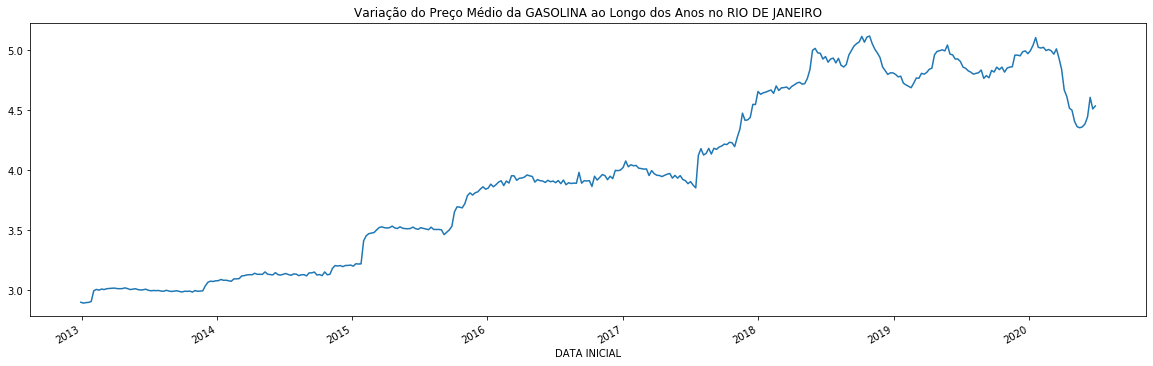

In [269]:
gasolina = gasolina.set_index(['DATA INICIAL'])
gasolina['PREÇO MÉDIO REVENDA'].plot(title='Variação do Preço Médio da GASOLINA ao Longo dos Anos no RIO DE JANEIRO',figsize=(20,6))
gasolina = gasolina.reset_index()

In [397]:
combustiveis_br = anp.copy()

dif_pm_uf_prod = {}
for produto in combustiveis_br['PRODUTO'].unique():
    combustiveis_uf = combustiveis_br[combustiveis_br['PRODUTO'] == produto]
    dif_prod_uf =[]
    dic_dif={}
    for uf in combustiveis_uf['ESTADO'].unique():
        #print(uf)
        combustiveis_uf_prod = combustiveis_uf[combustiveis_uf['ESTADO'] == uf]
        combustiveis_uf_2019 = combustiveis_uf_prod[combustiveis_uf_prod['DATA INICIAL'].dt.year == 2019]
        combustiveis_uf_2020 = combustiveis_uf_prod[combustiveis_uf_prod['DATA INICIAL'].dt.year == 2020]
        combustiveis_uf_media_2020 = combustiveis_uf_2020['PREÇO MÉDIO REVENDA'].mean(skipna=False)
        #print(combustiveis_uf_media_2020)
        combustiveis_uf_media_2019 = combustiveis_uf_2019['PREÇO MÉDIO REVENDA'].mean(skipna=False)
        #print(combustiveis_uf_media_2019)
        dif = round((100 * combustiveis_uf_media_2019 / combustiveis_uf_media_2020)-100, 3)
        dic_dif[uf] = dif
    dif_pm_uf_prod[produto] = dic_dif

df = pd.DataFrame(dif_pm_uf_prod)
df


,ETANOL HIDRATADO,ÓLEO DIESEL,ÓLEO DIESEL S10,GASOLINA COMUM,GLP,GNV
ACRE,-0.957,1.674,4.152,3.081,-4.583,NaN
ALAGOAS,1.648,5.104,4.173,4.800,0.122,-1.726
AMAPA,-2.337,14.159,20.504,13.649,-5.506,NaN
AMAZONAS,-2.346,4.568,3.881,-4.833,-3.377,-3.448
BAHIA,2.826,6.125,6.143,4.425,-1.287,2.797
CEARA,2.265,6.043,6.496,4.251,-1.793,-0.393
DISTRITO FEDERAL,-0.084,7.129,7.472,5.793,3.687,-3.949
ESPIRITO SANTO,-1.006,10.116,7.308,6.610,-3.595,0.279
GOIAS,0.261,5.975,5.918,5.128,0.458,18.207
MARANHAO,0.031,7.586,6.420,4.981,-2.057,-25.389


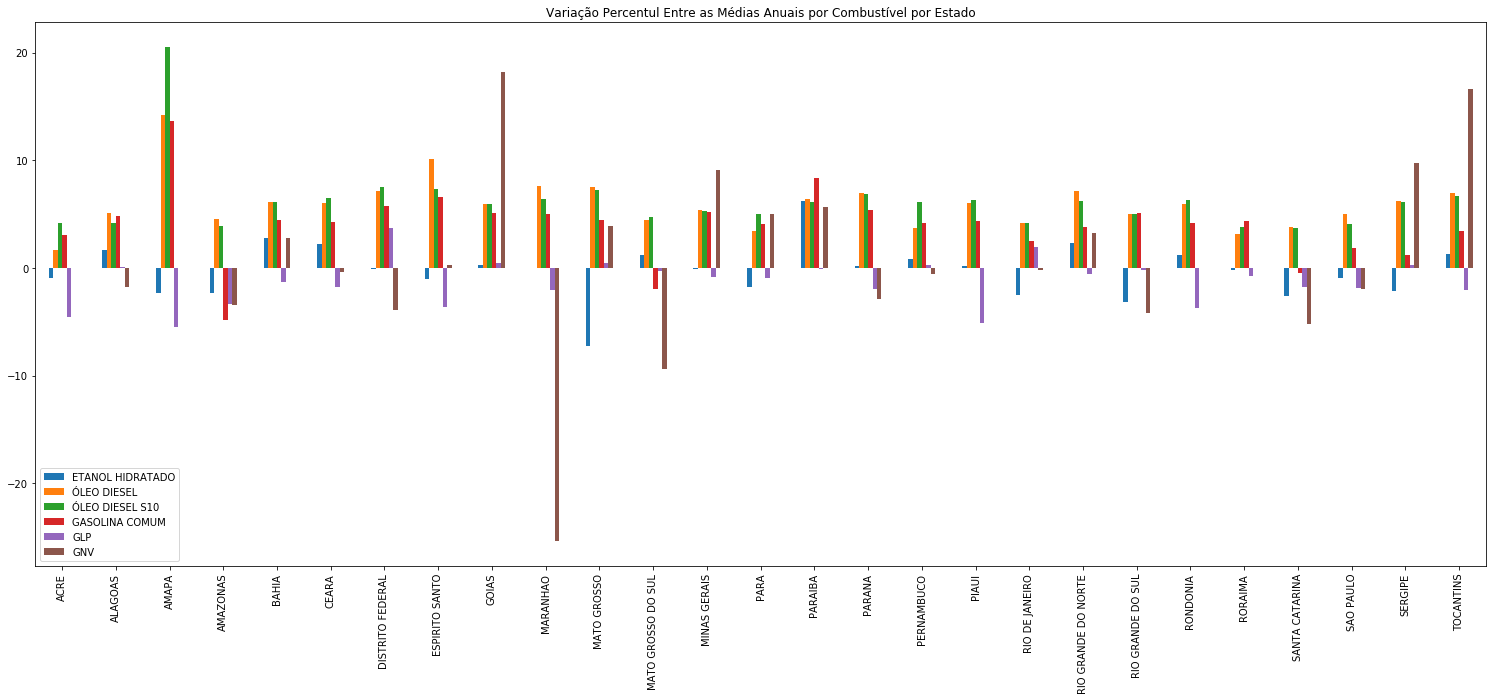

In [399]:
df.plot(kind='bar', figsize=(26,10), title='Variação Percentul Entre as Médias Anuais por Combustível por Estado')